In [1]:
import numpy as np
from gcs import GCSforBlocks, make_simple_transparent_gcs_test


from pydrake.geometry.optimization import Point

Adding layers: 100%|███████████████████████████| 10/10 [00:00<00:00, 246.58it/s]


Solving...
Optimal cost is 43.1
[[1. 0. 3. 0. 5. 0. 7. 0.]
 [7. 0. 3. 0. 5. 0. 7. 0.]
 [0. 1. 3. 0. 5. 0. 0. 1.]
 [5. 0. 3. 0. 5. 0. 0. 1.]
 [0. 3. 3. 0. 0. 3. 0. 1.]
 [3. 0. 3. 0. 0. 3. 0. 1.]
 [0. 5. 0. 5. 0. 3. 0. 1.]
 [0. 7. 0. 5. 0. 3. 0. 1.]]
Start at [1. 0.]
Move to [7. 0.] ; Grasp   block 3
Move to [0. 1.] ; Ungrasp block 3
Move to [5. 0.] ; Grasp   block 2
Move to [0. 3.] ; Ungrasp block 2
Move to [3. 0.] ; Grasp   block 1
Move to [0. 5.] ; Ungrasp block 1
Move to [0. 7.] ; Finish


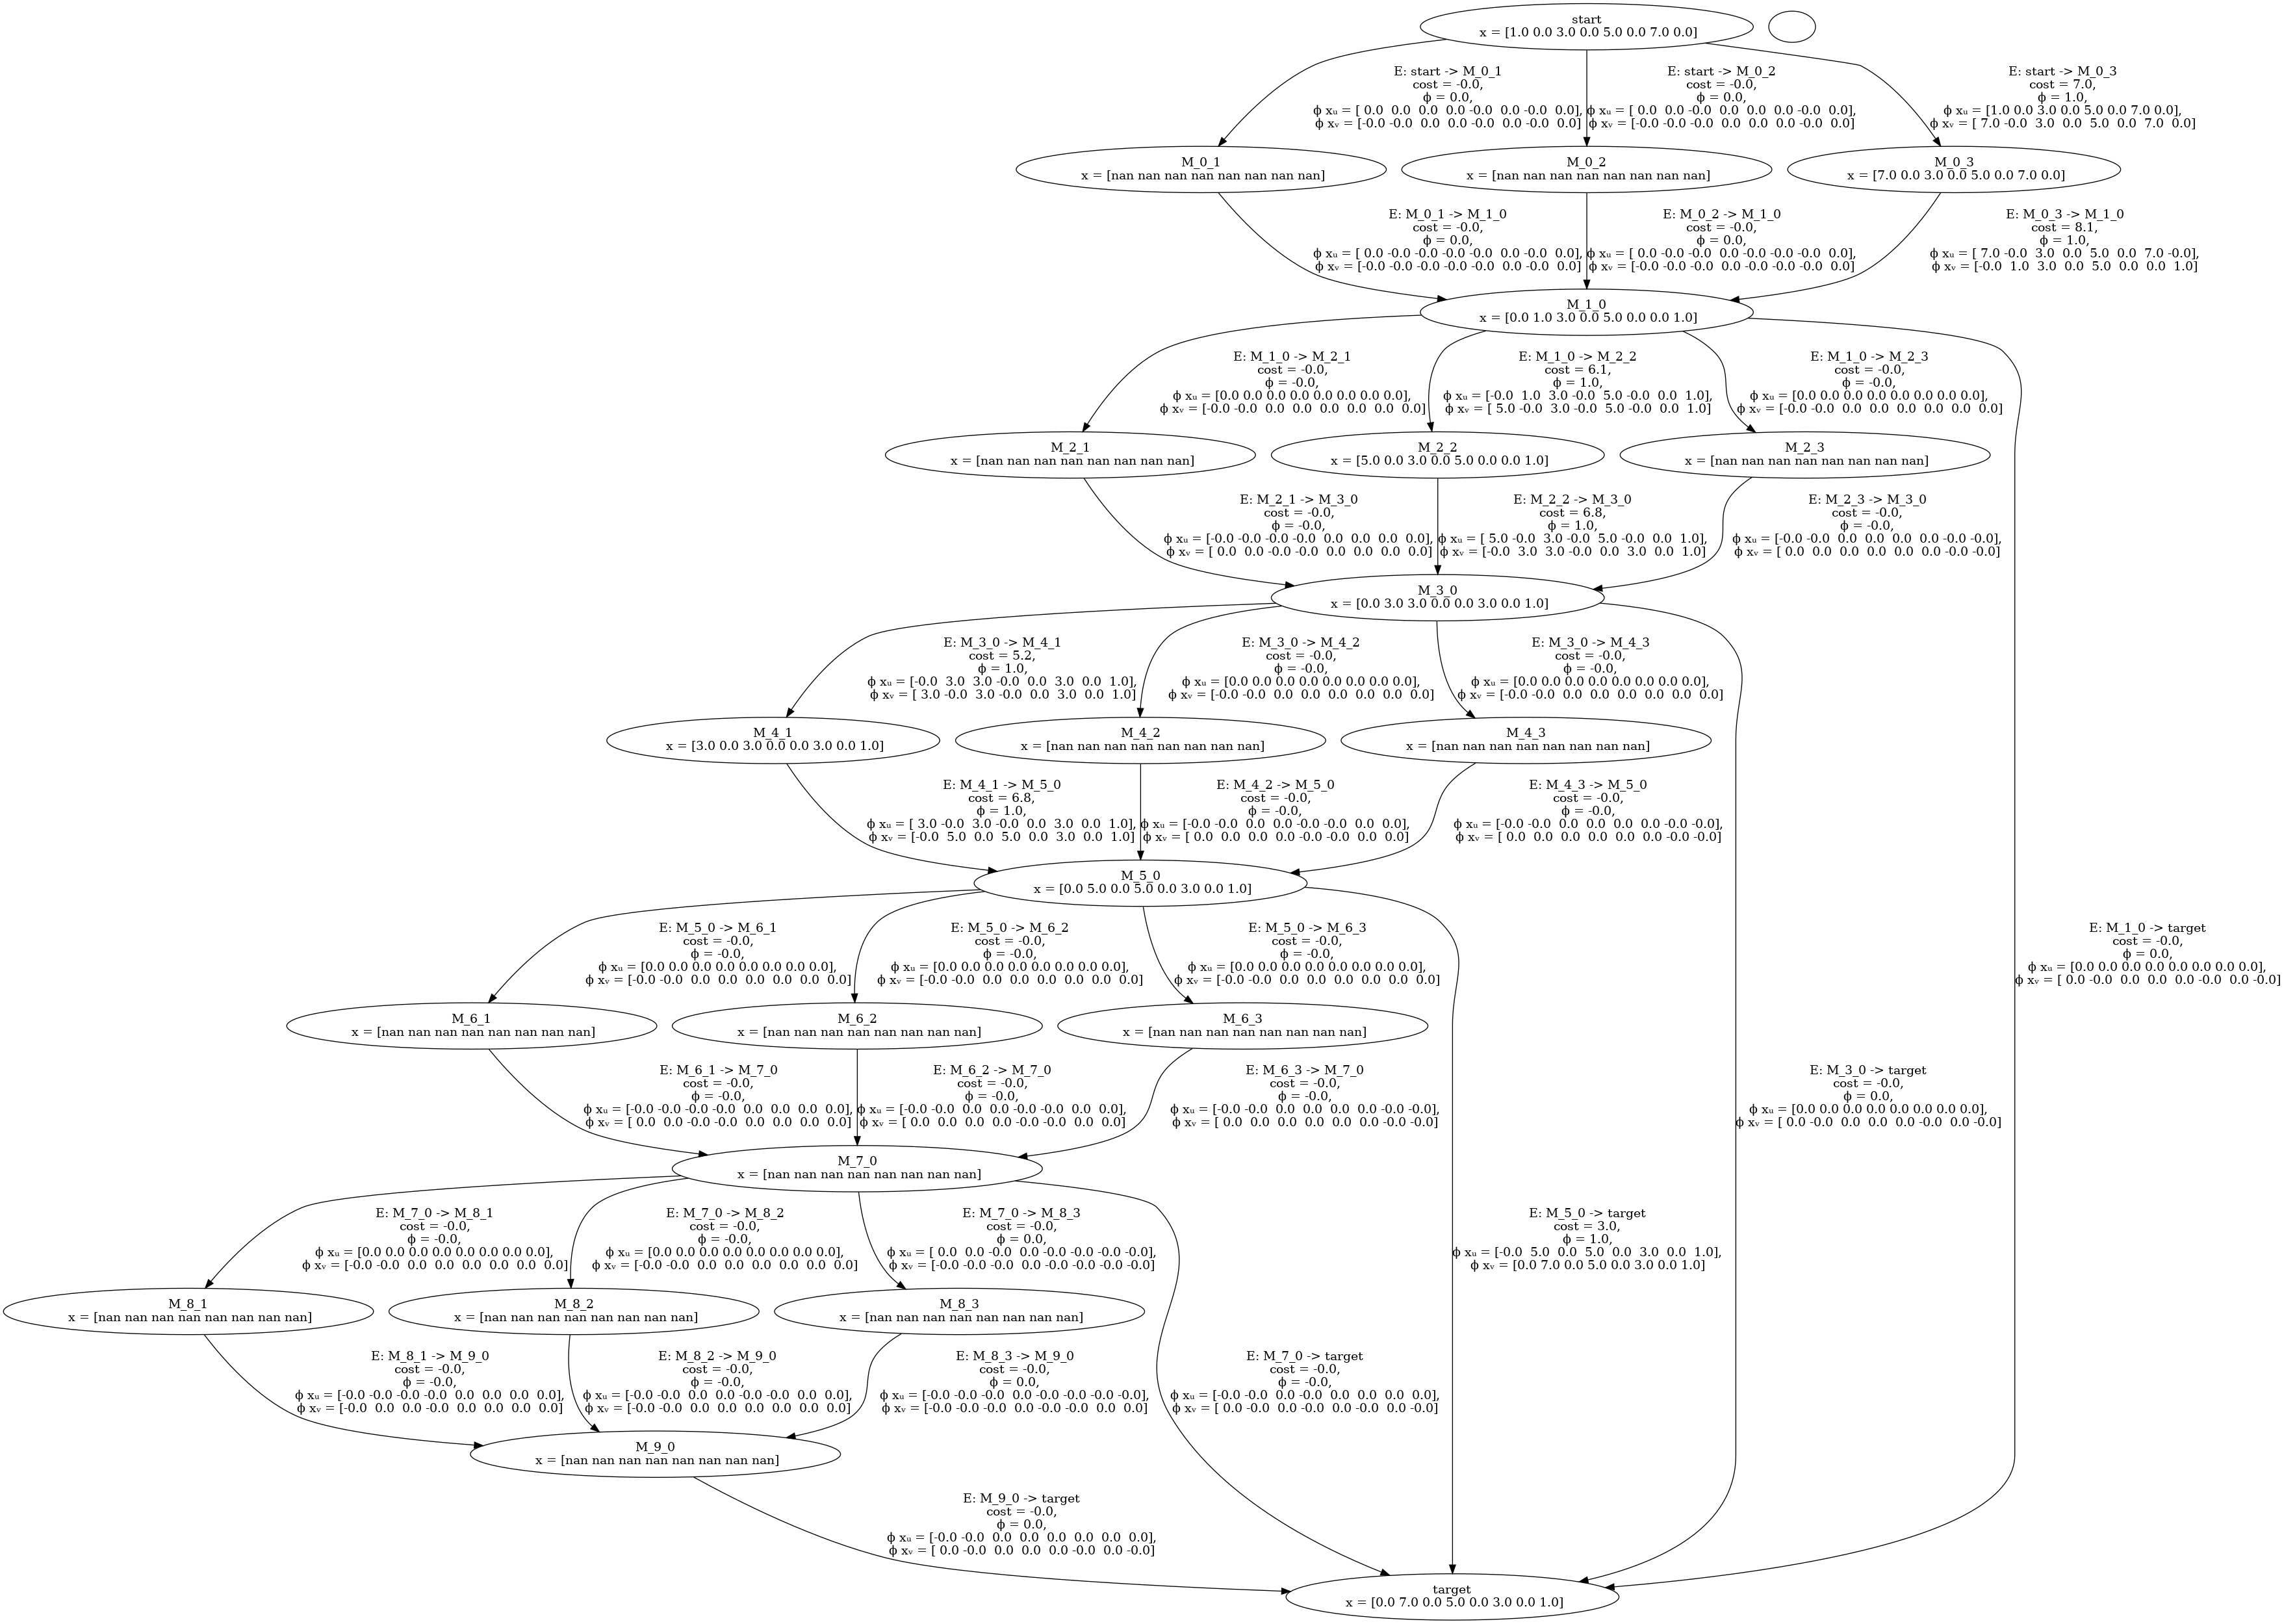

In [2]:
block_dim = 2
num_blocks = 3
horizon = 10
max_rounded_paths = 100

gcs = GCSforBlocks(block_dim, num_blocks, horizon)
width = 1
ub = width * 2 * (num_blocks + 1)
gcs.set_block_width(width)
gcs.set_ub(ub)

initial_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[0] = width * (2 * i + 1)
    initial_state += block_state
initial_point = Point(np.array(initial_state))
final_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[-1] = ub - width * (2 * i + 1)
    final_state += block_state
final_point = Point(np.array(final_state))
gcs.build_the_graph(initial_point, 0, final_point, 0)
gcs.solve(max_rounded_paths=max_rounded_paths)
gcs.verbose_solution_description()
gcs.display_graph()

In [9]:
gcs.modes_per_layer

[{1, 2, 3},
 {0},
 {1, 2, 3},
 {0},
 {1, 2, 3},
 {0},
 {1, 2, 3},
 {0},
 {1, 2, 3},
 {0}]

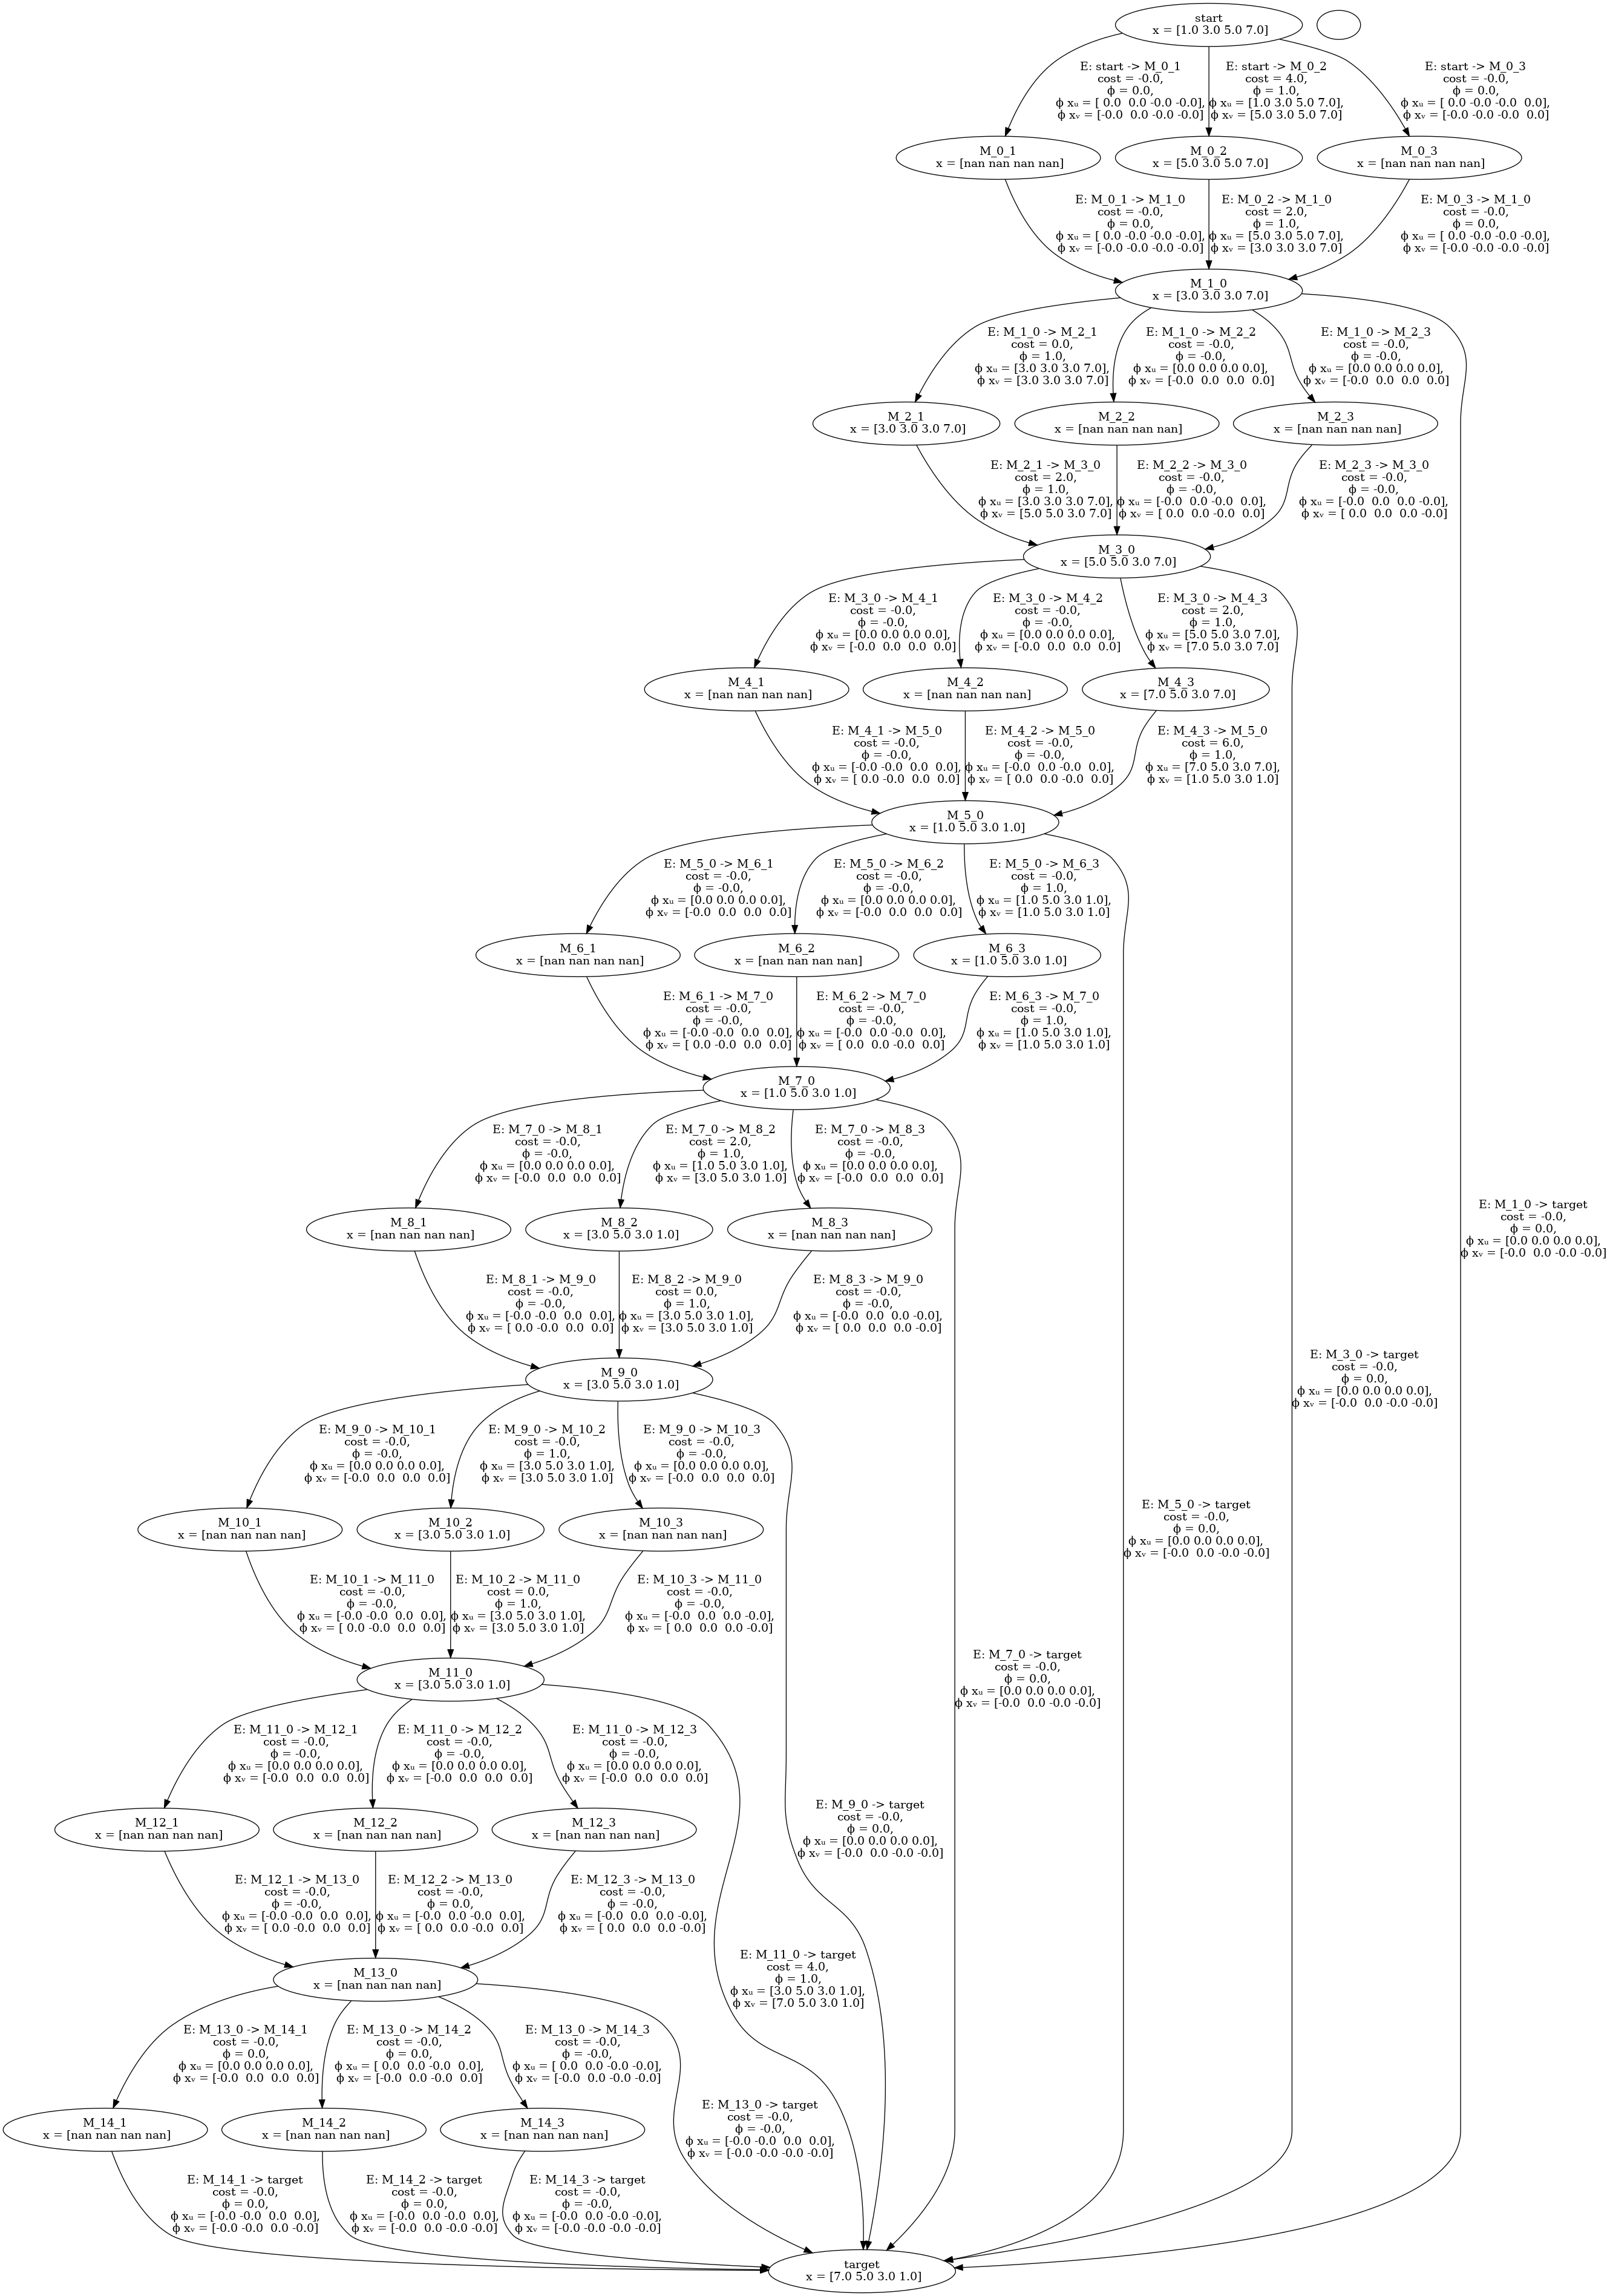

In [3]:
gcs.display_graph()

In [4]:
gcs.get_ctrl_points(gcs.solution)

Path:
['start', 'M_0_1', 'M_1_0', 'M_2_2', 'M_3_0', 'target']


array([[0., 2., 4.],
       [2., 2., 4.],
       [5., 5., 4.],
       [4., 5., 4.],
       [7., 5., 7.],
       [0., 5., 7.]])

In [10]:
gcs.solution.get_solver_id().name()

'Mosek'

In [6]:
gcs.solution.get_x_val()

array([ 8.22602361e-01,  2.27264336e-09,  1.53638406e+00,  3.60049910e+00,
        2.42117616e-09,  1.53638406e+00,  3.60049910e+00,  1.90015981e-09,
        1.99275045e-08,  3.97558317e-08,  3.97676307e-08,  7.95685907e-08,
        1.74168615e-07,  1.74133649e-07,  7.95908090e-08,  1.35399691e-07,
        8.15688051e-09,  3.29863746e-08,  1.63998903e-08,  3.28562713e-08,
        6.34797207e-08,  1.63524720e-08,  6.35299787e-08,  3.04670506e-08,
        6.89257064e-02,  5.46793444e-09,  6.64391669e-09,  3.99500782e-01,
        6.58720203e-09,  6.61270666e-09,  3.99500782e-01,  2.33383599e-09,
        1.08471905e-01,  5.34433622e-09,  4.63615877e-01,  6.71769718e-09,
        6.60609648e-09,  4.63615877e-01,  6.65984884e-09,  2.30061717e-09,
        5.80059670e-01,  3.86840589e-08,  9.49582491e-01,  2.79233752e+00,
        2.59972042e-08,  9.49582491e-01,  2.79233752e+00,  1.34471233e-08,
        6.89257063e-02,  6.61509693e-09,  6.61881180e-09,  3.99500782e-01,
        6.79557002e-01,  

In [ ]:
M0.PointInSet(p.x())

In [ ]:
mat = np.zeros((3, 3))
mat[:, 0] = np.ones(3)
mat